**ASSIGNMENT-1** 
**Balaji Ravi Kumar**

Neural Networks

The library tensorflow.keras.datasets is used to load the IMDB Dataset in the workspace.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension)

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Vectorised Train & Test data

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building Model using Relu function

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model with batch size 512 and 20 epochs 

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 46ms/step - loss: 0.5236 - accuracy: 0.7993 - val_loss: 0.3988 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3202 - accuracy: 0.9027 - val_loss: 0.3177 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2347 - accuracy: 0.9253 - val_loss: 0.2813 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1826 - accuracy: 0.9415 - val_loss: 0.2924 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1502 - accuracy: 0.9533 - val_loss: 0.2772 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1229 - accuracy: 0.9616 - val_loss: 0.3011 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1040 - accuracy: 0.9683 - val_loss: 0.3058 - val_accuracy: 0.8829
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

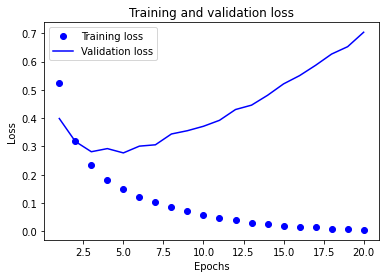

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

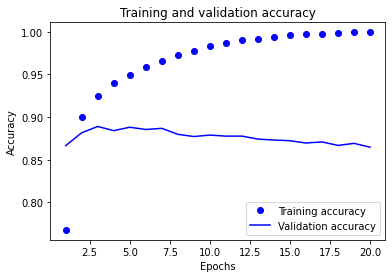

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training the model from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4533 - accuracy: 0.8190
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2584 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1983 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3019 - accuracy: 0.8808


In [ ]:
results


[0.29128843545913696, 0.8845199942588806]

In [ ]:
model.predict(x_test)

array([[0.25194812],
       [0.99962604],
       [0.8512005 ],
       ...,
       [0.2227275 ],
       [0.09397554],
       [0.7233315 ]], dtype=float32)

Model-2

In [ ]:
model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 33ms/step - loss: 0.4893 - accuracy: 0.8180
Epoch 2/5
49/49 [==============================] - 2s 33ms/step - loss: 0.2778 - accuracy: 0.9056
Epoch 3/5
49/49 [==============================] - 2s 33ms/step - loss: 0.2097 - accuracy: 0.9258
Epoch 4/5
49/49 [==============================] - 2s 33ms/step - loss: 0.1742 - accuracy: 0.9381
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3111 - accuracy: 0.8792


In [ ]:
results

[0.31107252836227417, 0.8792399764060974]

Model-1.1
Trained with 3 layers

In [ ]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5278 - accuracy: 0.7671 - val_loss: 0.3860 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2962 - accuracy: 0.9016 - val_loss: 0.3125 - val_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2148 - accuracy: 0.9273 - val_loss: 0.2778 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1689 - accuracy: 0.9429 - val_loss: 0.2874 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1314 - accuracy: 0.9586 - val_loss: 0.2978 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1144 - accuracy: 0.9623 - val_loss: 0.3190 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0866 - accuracy: 0.9758 - val_loss: 0.3510 - val_accuracy: 0.8775
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

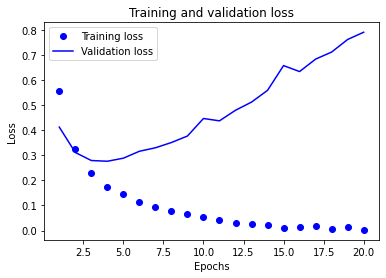

In [ ]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

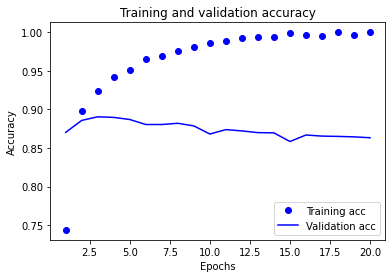

In [ ]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/12
49/49 [==============================] - 1s 30ms/step - loss: 0.2494 - accuracy: 0.9440
Epoch 2/12
49/49 [==============================] - 1s 30ms/step - loss: 0.1380 - accuracy: 0.9595
Epoch 3/12
49/49 [==============================] - 1s 29ms/step - loss: 0.1073 - accuracy: 0.9679
Epoch 4/12
49/49 [==============================] - 1s 30ms/step - loss: 0.0855 - accuracy: 0.9734
Epoch 5/12
49/49 [==============================] - 1s 30ms/step - loss: 0.0673 - accuracy: 0.9793
Epoch 6/12
49/49 [==============================] - 1s 29ms/step - loss: 0.0502 - accuracy: 0.9860
Epoch 7/12
49/49 [==============================] - 1s 29ms/step - loss: 0.0400 - accuracy: 0.9886
Epoch 8/12
49/49 [==============================] - 1s 29ms/step - loss: 0.0282 - accuracy: 0.9924
Epoch 9/12
49/49 [==============================] - 1s 29ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 10/12
49/49 [==============================] - 1s 29ms/step - loss: 0.0160 - accuracy: 0.9956
Epoch 11/

[0.301872193813324, 0.8808000087738037]

HYPERTUNING

Training the model with 32-Units

In [ ]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.4888 - accuracy: 0.7844 - val_loss: 0.3420 - val_accuracy: 0.8746
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2737 - accuracy: 0.9037 - val_loss: 0.2987 - val_accuracy: 0.8813
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2021 - accuracy: 0.9301 - val_loss: 0.2746 - val_accuracy: 0.8920
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1541 - accuracy: 0.9481 - val_loss: 0.3808 - val_accuracy: 0.8494
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1277 - accuracy: 0.9576 - val_loss: 0.2981 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0973 - accuracy: 0.9687 - val_loss: 0.3255 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0768 - accuracy: 0.9759 - val_loss: 0.4180 - val_accuracy: 0.8603
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

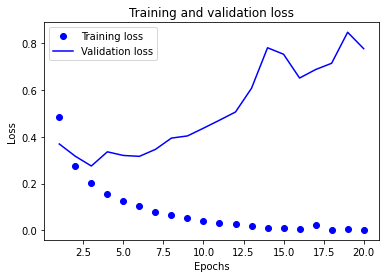

In [ ]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

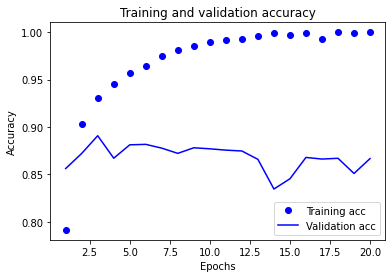

In [ ]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 2s 35ms/step - loss: 0.2248 - accuracy: 0.9466
Epoch 2/8
49/49 [==============================] - 2s 34ms/step - loss: 0.1239 - accuracy: 0.9628
Epoch 3/8
49/49 [==============================] - 2s 34ms/step - loss: 0.0898 - accuracy: 0.9728
Epoch 4/8
49/49 [==============================] - 2s 34ms/step - loss: 0.0653 - accuracy: 0.9804
Epoch 5/8
49/49 [==============================] - 3s 59ms/step - loss: 0.0481 - accuracy: 0.9852
Epoch 6/8
49/49 [==============================] - 3s 67ms/step - loss: 0.0325 - accuracy: 0.9908
Epoch 7/8
49/49 [==============================] - 3s 65ms/step - loss: 0.0232 - accuracy: 0.9938
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.8179 - accuracy: 0.8545


[0.817875862121582, 0.8545200228691101]

Training the model with 64-Units

In [ ]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.4875 - accuracy: 0.7833 - val_loss: 0.3692 - val_accuracy: 0.8475
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2608 - accuracy: 0.9038 - val_loss: 0.2884 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1913 - accuracy: 0.9299 - val_loss: 0.2980 - val_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1514 - accuracy: 0.9451 - val_loss: 0.2896 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1065 - accuracy: 0.9643 - val_loss: 0.3209 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0883 - accuracy: 0.9710 - val_loss: 0.3557 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0636 - accuracy: 0.9811 - val_loss: 0.4117 - val_accuracy: 0.8673
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

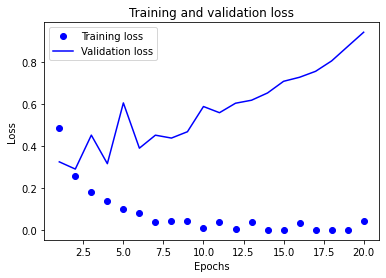

In [ ]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

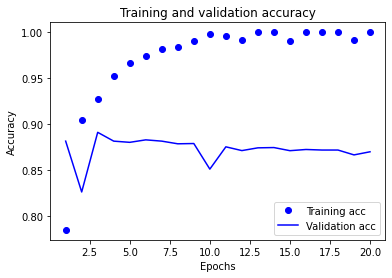

In [ ]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 2s 50ms/step - loss: 0.2061 - accuracy: 0.9469
Epoch 2/8
49/49 [==============================] - 2s 50ms/step - loss: 0.0980 - accuracy: 0.9687
Epoch 3/8
49/49 [==============================] - 2s 50ms/step - loss: 0.0596 - accuracy: 0.9821
Epoch 4/8
49/49 [==============================] - 2s 49ms/step - loss: 0.0332 - accuracy: 0.9908
Epoch 5/8
49/49 [==============================] - 2s 50ms/step - loss: 0.0184 - accuracy: 0.9952
Epoch 6/8
49/49 [==============================] - 2s 51ms/step - loss: 0.0183 - accuracy: 0.9950
Epoch 7/8
49/49 [==============================] - 2s 50ms/step - loss: 0.0088 - accuracy: 0.9978
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.9634 - accuracy: 0.8597


[0.9634003043174744, 0.8596799969673157]

Training the model with 128-Units

In [ ]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.4910 - accuracy: 0.7592 - val_loss: 0.3131 - val_accuracy: 0.8804
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2554 - accuracy: 0.9045 - val_loss: 0.2708 - val_accuracy: 0.8926
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1767 - accuracy: 0.9323 - val_loss: 0.3132 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1091 - accuracy: 0.9619 - val_loss: 0.3402 - val_accuracy: 0.8758
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0831 - accuracy: 0.9715 - val_loss: 0.3808 - val_accuracy: 0.8757
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0627 - accuracy: 0.9813 - val_loss: 0.3911 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0499 - accuracy: 0.9858 - val_loss: 0.3972 - val_accuracy: 0.8818
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

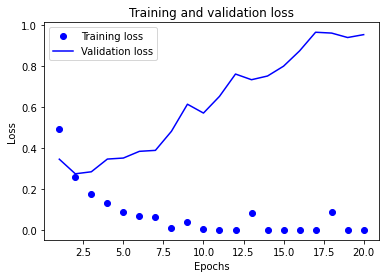

In [ ]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

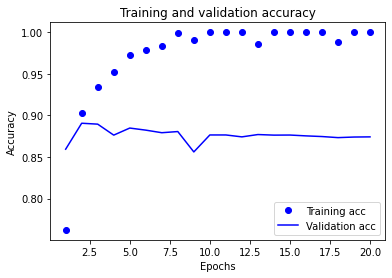

In [ ]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 4s 71ms/step - loss: 0.1911 - accuracy: 0.9470
Epoch 2/8
49/49 [==============================] - 3s 71ms/step - loss: 0.0785 - accuracy: 0.9750
Epoch 3/8
49/49 [==============================] - 3s 70ms/step - loss: 0.0358 - accuracy: 0.9897
Epoch 4/8
49/49 [==============================] - 3s 71ms/step - loss: 0.0380 - accuracy: 0.9923
Epoch 5/8
49/49 [==============================] - 3s 71ms/step - loss: 0.0164 - accuracy: 0.9954
Epoch 6/8
49/49 [==============================] - 4s 76ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 7/8
49/49 [==============================] - 3s 71ms/step - loss: 0.0275 - accuracy: 0.9953
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 1.1234 - accuracy: 0.8665


[1.123350977897644, 0.8665199875831604]

Loss Function

In [ ]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.1727 - accuracy: 0.7974 - val_loss: 0.1333 - val_accuracy: 0.8512
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0980 - accuracy: 0.9026 - val_loss: 0.0982 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0696 - accuracy: 0.9291 - val_loss: 0.0872 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0544 - accuracy: 0.9423 - val_loss: 0.0898 - val_accuracy: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0446 - accuracy: 0.9543 - val_loss: 0.0878 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0360 - accuracy: 0.9639 - val_loss: 0.0832 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0299 - accuracy: 0.9709 - val_loss: 0.0871 - val_accuracy: 0.8808
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

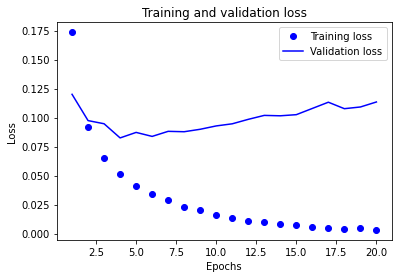

In [ ]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

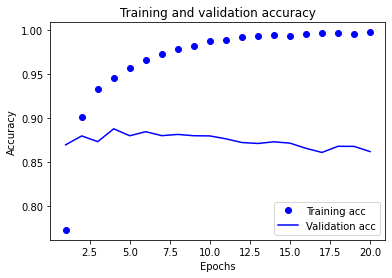

In [ ]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0444 - accuracy: 0.9473
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0340 - accuracy: 0.9610
Epoch 3/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0279 - accuracy: 0.9696
Epoch 4/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0240 - accuracy: 0.9748
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0212 - accuracy: 0.9788
Epoch 6/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0189 - accuracy: 0.9812
Epoch 7/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0173 - accuracy: 0.9826
Epoch 8/8
782/782 [==============================] - 3s 3ms/step - loss: 0.1178 - accuracy: 0.8596


[0.11778899282217026, 0.8595600128173828]

Training the model using Tanh Activation Function

In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.4709 - accuracy: 0.7903 - val_loss: 0.3470 - val_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2668 - accuracy: 0.9069 - val_loss: 0.3507 - val_accuracy: 0.8503
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1911 - accuracy: 0.9341 - val_loss: 0.2875 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1444 - accuracy: 0.9493 - val_loss: 0.2923 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1123 - accuracy: 0.9620 - val_loss: 0.3144 - val_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0869 - accuracy: 0.9737 - val_loss: 0.4073 - val_accuracy: 0.8650
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0659 - accuracy: 0.9809 - val_loss: 0.3889 - val_accuracy: 0.8762
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

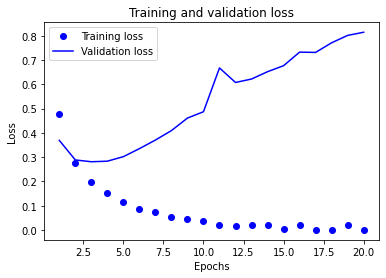

In [ ]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

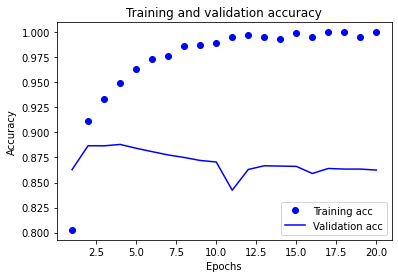

In [ ]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 14ms/step - loss: 0.3061 - accuracy: 0.9433
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1483 - accuracy: 0.9611
Epoch 3/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1146 - accuracy: 0.9662
Epoch 4/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0932 - accuracy: 0.9713
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0794 - accuracy: 0.9757
Epoch 6/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0690 - accuracy: 0.9790
Epoch 7/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0571 - accuracy: 0.9828
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.6608 - accuracy: 0.8510


[0.660784900188446, 0.8510400056838989]

Regularisation

In [ ]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5733 - accuracy: 0.7862 - val_loss: 0.4546 - val_accuracy: 0.8520
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3732 - accuracy: 0.8953 - val_loss: 0.3614 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2995 - accuracy: 0.9175 - val_loss: 0.3479 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2632 - accuracy: 0.9283 - val_loss: 0.3306 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2392 - accuracy: 0.9396 - val_loss: 0.3326 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2243 - accuracy: 0.9445 - val_loss: 0.3379 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2111 - accuracy: 0.9502 - val_loss: 0.3425 - val_accuracy: 0.8845
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

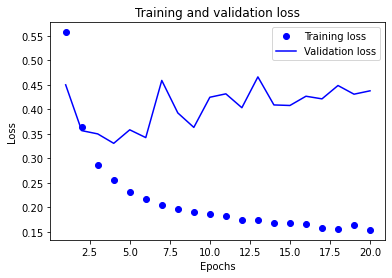

In [ ]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

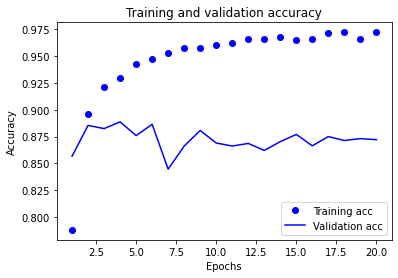

In [ ]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 1s 15ms/step - loss: 0.2523 - accuracy: 0.9338
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.2156 - accuracy: 0.9435
Epoch 3/8
49/49 [==============================] - 1s 14ms/step - loss: 0.2045 - accuracy: 0.9466
Epoch 4/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1972 - accuracy: 0.9498
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1922 - accuracy: 0.9523
Epoch 6/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1851 - accuracy: 0.9550
Epoch 7/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1844 - accuracy: 0.9543
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.4186 - accuracy: 0.8699


[0.41862916946411133, 0.8698800206184387]

Dropout

In [ ]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6021 - accuracy: 0.6778 - val_loss: 0.4554 - val_accuracy: 0.8469
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4550 - accuracy: 0.8065 - val_loss: 0.3570 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3739 - accuracy: 0.8557 - val_loss: 0.3196 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3199 - accuracy: 0.8857 - val_loss: 0.2936 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2769 - accuracy: 0.9011 - val_loss: 0.2707 - val_accuracy: 0.8919
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2405 - accuracy: 0.9175 - val_loss: 0.2786 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2122 - accuracy: 0.9293 - val_loss: 0.2952 - val_accuracy: 0.8888
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

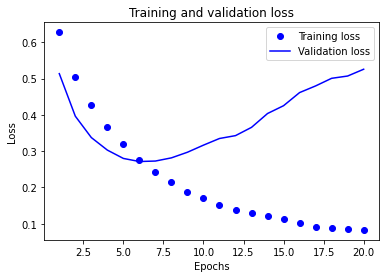

In [ ]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

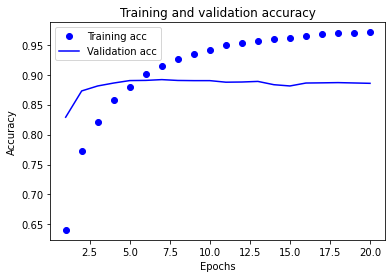

In [ ]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 15ms/step - loss: 0.2648 - accuracy: 0.9225
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.2209 - accuracy: 0.9316
Epoch 3/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1982 - accuracy: 0.9396
Epoch 4/8
49/49 [==============================] - 1s 15ms/step - loss: 0.1771 - accuracy: 0.9435
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1645 - accuracy: 0.9454
Epoch 6/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1536 - accuracy: 0.9483
Epoch 7/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1445 - accuracy: 0.9500
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.5209 - accuracy: 0.8702


[0.5208941102027893, 0.8701599836349487]

Training the model with Hypertunned Parameters

In [ ]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.2422 - accuracy: 0.5995 - val_loss: 0.1846 - val_accuracy: 0.8424
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1832 - accuracy: 0.7563 - val_loss: 0.1312 - val_accuracy: 0.8463
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1395 - accuracy: 0.8343 - val_loss: 0.0986 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1078 - accuracy: 0.8831 - val_loss: 0.0932 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0904 - accuracy: 0.9033 - val_loss: 0.1001 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0779 - accuracy: 0.9218 - val_loss: 0.0966 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0681 - accuracy: 0.9330 - val_loss: 0.0989 - val_accuracy: 0.8871
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

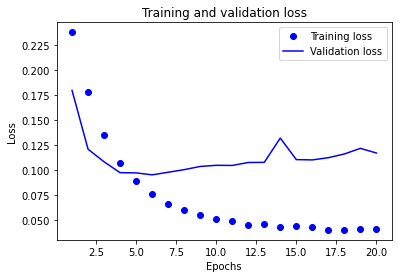

In [ ]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

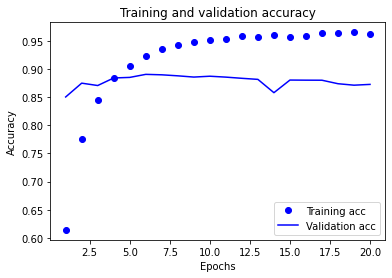

In [ ]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0731 - accuracy: 0.9233
Epoch 2/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0668 - accuracy: 0.9302
Epoch 3/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0618 - accuracy: 0.9367
Epoch 4/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0596 - accuracy: 0.9386
Epoch 5/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0581 - accuracy: 0.9423
Epoch 6/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0553 - accuracy: 0.9449
Epoch 7/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0552 - accuracy: 0.9442
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.1142 - accuracy: 0.8746


[0.11417917907238007, 0.8745599985122681]

Summary of all models

In [ ]:
All_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularisation[0],results_tanh[0]])*100
All_Loss
All_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularisation[1],results_tanh[1]])*100
All_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularisation','model_tanh']

plt.clf()

<Figure size 432x288 with 0 Axes>

Comparing all models using graph

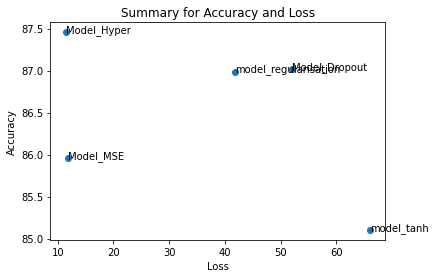

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

**Summary**

Model Compiling: Binary cross entropy loss function measures the performance of a classification model whose output is a probability value between 0 and 1. It is preferred for classification, while mean squared error (MSE) is one of the best choices for regression.

MSE tells us how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line and squaring them. The squaring is necessary to remove any negative signs.

From graph we can say that Maximun accuracy and loss were achieved using Model_Hyper. We employed three thick layers (32,32,16) with a drop out rate of 0.5 for each. We utilize MSE to compare the model MSE loss to any other model (other than Final Hypertuned Model) With MSE, we observe that the loss is negligible.

Units: As we raise the unit from 16, 32, 64, 128, we can observe that the accuracy changes very little while the loss function decreases.

Hidden Layers: We found that increasing the number of hidden layers from 1 to 3 had no effect on loss function accuracy or deflection.

Loss Function: When "mse" is used as the loss function for the IMDB dataset, the loss value is minimal when compared to binary cross entropy.

Activation Function: The model's tanh activation function has a low accuracy, which lowers performance owing to the vanishing gradient problem.

Regularization: When compared to the initial model, regularization results in a much smaller loss with less overfitting, with the L-2 model demonstrating somewhat superior accuracy.

Dropout: The dropout also aids in achieving a smaller loss function but has no effect on accuracy.


optimiser: Adam optimizer gives much higher performance than the previously used optimisers and outperforms them by a big margin into giving an optimized gradient descent.

Using adam, I have got a test accuracy which stands at 88.08 and the loss at the rate:13.05 Adam might improve the optimization of the model which might lead to different results. As you can see in this case, the accuracy has been comparitively less compared to the other.